<a href="https://colab.research.google.com/github/clwilkinson7/Temp/blob/main/Assignment1_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving housePrice.csv to housePrice.csv


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import csv
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import re

In [38]:
data = pd.read_csv('housePrice.csv')
data

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Last Sold Year,Last Sold For,Address,City,State,Zipcode,Address Full
0,"$895,900","3,447 sqft",-112.081985,33.560055,"7,895 sqft",4.0,4.5,2019.0,$260/sqft,NaN,NaN,"630 W Echo Ln Phoenix, AZ 85021",Phoenix,AZ,85021.0,"630 W Echo Ln, Phoenix, AZ 85021"
1,"$247,000","1,767 sqft",-96.676250,32.829227,"7,877 sqft",3.0,2.0,1954.0,$140/sqft,NaN,NaN,"2367 Highwood Dr Dallas, TX 75228",Dallas,TX,75228.0,"2367 Highwood Dr, Dallas, TX 75228"
2,"$44,900","1,232 sqft",-78.825190,42.913000,"3,510 sqft",3.0,1.0,1900.0,$36/sqft,NaN,NaN,"30 Hurlock Ave Buffalo, NY 14211",Buffalo,NY,14211.0,"30 Hurlock Ave, Buffalo, NY 14211"
3,"$959,000","1,417 sqft",-73.860170,40.722960,"2,598 sqft",3.0,2.0,1939.0,$677/sqft,2009.0,"$532,000","6416 Alderton St Flushing, NY 11374",Flushing,NY,11374.0,"6416 Alderton St, Flushing, NY 11374"
4,"$83,500",440 sqft,-80.206314,25.937965,NaN,NaN,1.0,1971.0,$190/sqft,2007.0,"$52,000","251 NW 177th St #A-123 Miami Gardens, FL 33169",Miami Gardens,FL,33169.0,"251 NW 177th St #A-123, Miami Gardens, FL 33169"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30001,"$300,000",733 sqft,-80.187720,25.771372,NaN,1.0,1.0,2008.0,$409/sqft,2014.0,"$345,000","300 S Biscayne Blvd #T-3507 Miami, FL 33131",Miami,FL,33131.0,"300 S Biscayne Blvd #T-3507, Miami, FL 33131"
30002,"$119,000","1,716 sqft",-121.031560,37.680702,18.84 acres,3.0,2.0,1998.0,$69/sqft,NaN,NaN,"2621 Prescott Rd #161 Modesto, CA 95350",Modesto,CA,95350.0,"2621 Prescott Rd #161, Modesto, CA 95350"
30003,"$210,000",NaN,-91.137700,30.440481,8276 sqft,NaN,NaN,NaN,NaN,NaN,NaN,"17 Claycut Rd #A Baton Rouge, LA 70806",Baton Rouge,LA,70806.0,"17 Claycut Rd #A, Baton Rouge, LA 70806"
30004,"$329,000",NaN,-73.913930,40.699930,NaN,7.0,3.0,2007.0,NaN,NaN,NaN,"360 Grove St Brooklyn, NY 11237",Brooklyn,NY,11237.0,"360 Grove St, Brooklyn, NY 11237"


In [39]:
issues = ["$", ",", "sqft", "acres", "acre", "/"]
for col in data:
  for issue in issues:
    try:
      data[col] = data[col].str.replace(issue, "")
    except AttributeError:
      pass

In [40]:
priceFormat = re.compile("[0-9]\Z")
for cell in data["Price"]:
  try:
    if not(priceFormat.findall(cell)):
      data["Price"] = data["Price"].replace(cell, np.nan)
  except TypeError:
    pass

In [41]:
for col in data:
  try:
    data[col] = data[col].astype(float)
  except ValueError:
    pass

In [42]:
data

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Last Sold Year,Last Sold For,Address,City,State,Zipcode,Address Full
0,895900.0,3447.0,-112.081985,33.560055,7895.00,4.0,4.5,2019.0,260.0,NaN,NaN,630 W Echo Ln Phoenix AZ 85021,Phoenix,AZ,85021.0,630 W Echo Ln Phoenix AZ 85021
1,247000.0,1767.0,-96.676250,32.829227,7877.00,3.0,2.0,1954.0,140.0,NaN,NaN,2367 Highwood Dr Dallas TX 75228,Dallas,TX,75228.0,2367 Highwood Dr Dallas TX 75228
2,44900.0,1232.0,-78.825190,42.913000,3510.00,3.0,1.0,1900.0,36.0,NaN,NaN,30 Hurlock Ave Buffalo NY 14211,Buffalo,NY,14211.0,30 Hurlock Ave Buffalo NY 14211
3,959000.0,1417.0,-73.860170,40.722960,2598.00,3.0,2.0,1939.0,677.0,2009.0,532000.0,6416 Alderton St Flushing NY 11374,Flushing,NY,11374.0,6416 Alderton St Flushing NY 11374
4,83500.0,440.0,-80.206314,25.937965,NaN,NaN,1.0,1971.0,190.0,2007.0,52000.0,251 NW 177th St #A-123 Miami Gardens FL 33169,Miami Gardens,FL,33169.0,251 NW 177th St #A-123 Miami Gardens FL 33169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30001,300000.0,733.0,-80.187720,25.771372,NaN,1.0,1.0,2008.0,409.0,2014.0,345000.0,300 S Biscayne Blvd #T-3507 Miami FL 33131,Miami,FL,33131.0,300 S Biscayne Blvd #T-3507 Miami FL 33131
30002,119000.0,1716.0,-121.031560,37.680702,18.84,3.0,2.0,1998.0,69.0,NaN,NaN,2621 Prescott Rd #161 Modesto CA 95350,Modesto,CA,95350.0,2621 Prescott Rd #161 Modesto CA 95350
30003,210000.0,NaN,-91.137700,30.440481,8276.00,NaN,NaN,NaN,NaN,NaN,NaN,17 Claycut Rd #A Baton Rouge LA 70806,Baton Rouge,LA,70806.0,17 Claycut Rd #A Baton Rouge LA 70806
30004,329000.0,NaN,-73.913930,40.699930,NaN,7.0,3.0,2007.0,NaN,NaN,NaN,360 Grove St Brooklyn NY 11237,Brooklyn,NY,11237.0,360 Grove St Brooklyn NY 11237


In [43]:
newData = data.drop(["Address Full", "Address", "City", "State"], axis = 1)
newData

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Last Sold Year,Last Sold For,Zipcode
0,895900.0,3447.0,-112.081985,33.560055,7895.00,4.0,4.5,2019.0,260.0,NaN,NaN,85021.0
1,247000.0,1767.0,-96.676250,32.829227,7877.00,3.0,2.0,1954.0,140.0,NaN,NaN,75228.0
2,44900.0,1232.0,-78.825190,42.913000,3510.00,3.0,1.0,1900.0,36.0,NaN,NaN,14211.0
3,959000.0,1417.0,-73.860170,40.722960,2598.00,3.0,2.0,1939.0,677.0,2009.0,532000.0,11374.0
4,83500.0,440.0,-80.206314,25.937965,NaN,NaN,1.0,1971.0,190.0,2007.0,52000.0,33169.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30001,300000.0,733.0,-80.187720,25.771372,NaN,1.0,1.0,2008.0,409.0,2014.0,345000.0,33131.0
30002,119000.0,1716.0,-121.031560,37.680702,18.84,3.0,2.0,1998.0,69.0,NaN,NaN,95350.0
30003,210000.0,NaN,-91.137700,30.440481,8276.00,NaN,NaN,NaN,NaN,NaN,NaN,70806.0
30004,329000.0,NaN,-73.913930,40.699930,NaN,7.0,3.0,2007.0,NaN,NaN,NaN,11237.0


In [44]:
#Can only be ran once
def Outlier(df, col):
    newdf = df[col]
    newdf = newdf.astype(float)
    Q1 = newdf.quantile(0.25)
    Q3 = newdf.quantile(0.75)
    IQR = (Q3 - Q1)

    count = 0
    for i in range(len(df)):
      if Q3 > newdf[i] >= (Q1 - 1.5 * IQR):
        pass
      elif newdf[i] <= (Q3 + 1.5 * IQR):
        pass
      else:
        df[col] = df[col].replace(df[col][i], np.nan)
      count += 1

Outlier(newData, "Price")
Outlier(newData, "Sqr Ft")
Outlier(newData, "Lot Size")
Outlier(newData, "Beds")
Outlier(newData, "Bath")
Outlier(newData, "Price Sqr Ft")
Outlier(newData, "Year Built")
Outlier(newData, "Last Sold For")

In [45]:
from sklearn.model_selection import train_test_split

x = newData.drop("Price", axis = 1)
y = newData["Price"]

In [50]:
np.random.seed(42)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2)

trainMask = ~(np.isnan(xTrain).any(axis=1) | np.isnan(yTrain))
testMask2 = ~(np.isnan(xTest).any(axis=1) | np.isnan(yTest))

xTrain, yTrain = xTrain[trainMask], yTrain[trainMask]
xTest, yTest = xTest[testMask2], yTest[testMask2]

trainData = xTrain.join(yTrain)
testData = xTest.join(yTest)

In [51]:
trainData

,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Last Sold Year,Last Sold For,Zipcode,Price
618,2454.0,-104.821940,38.932410,9358.0,5.0,3.0,1977.0,143.0,2011.0,247000.0,80919.0,350000.0
17092,1620.0,-115.083730,36.106308,7841.0,3.0,2.0,1971.0,176.0,2019.0,162000.0,89121.0,284999.0
17026,1335.0,-80.803690,35.214720,7405.0,2.0,1.0,1940.0,318.0,2014.0,170000.0,28205.0,424900.0
15875,1100.0,-81.572290,30.345596,8363.0,3.0,2.0,1962.0,131.0,2002.0,89500.0,32211.0,144500.0
9693,2483.0,-112.116870,33.799350,6156.0,4.0,3.5,2003.0,149.0,2009.0,200000.0,85086.0,369000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21962,1323.0,-119.733370,39.441692,3843.0,2.0,3.0,2008.0,260.0,2017.0,30400.0,89521.0,344400.0
4426,972.0,-111.930405,33.618515,969.0,2.0,2.0,1994.0,264.0,2016.0,199000.0,85254.0,256512.0
29910,2200.0,-76.611145,39.310654,1132.0,3.0,3.0,1917.0,159.0,2005.0,30000.0,21202.0,350000.0
21575,1056.0,-84.470340,33.815710,7501.0,2.0,1.0,1940.0,223.0,1995.0,39000.0,30318.0,235000.0


In [52]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
xTrainS = standardScaler.fit_transform(xTrain)
xTestS = standardScaler.fit_transform(xTest)

In [53]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
linReg.fit(xTrain, yTrain)

linRegScore = linReg.score(xTest, yTest)

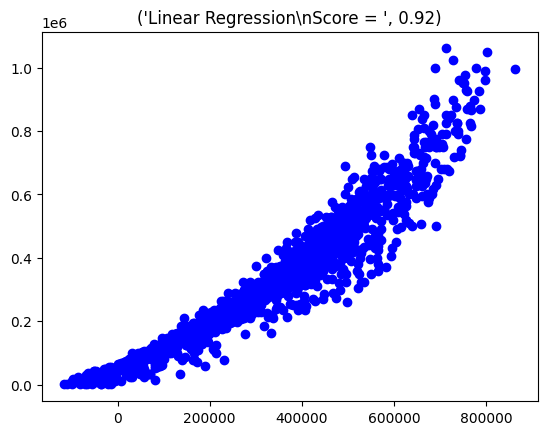

In [54]:
linRegpredictedPrice = pd.DataFrame(linReg.predict(xTest).round(1))

for i in range(len(linRegpredictedPrice)):
  plt.scatter(linRegpredictedPrice.iloc[i], yTest.iloc[i], c="blue", marker="o")

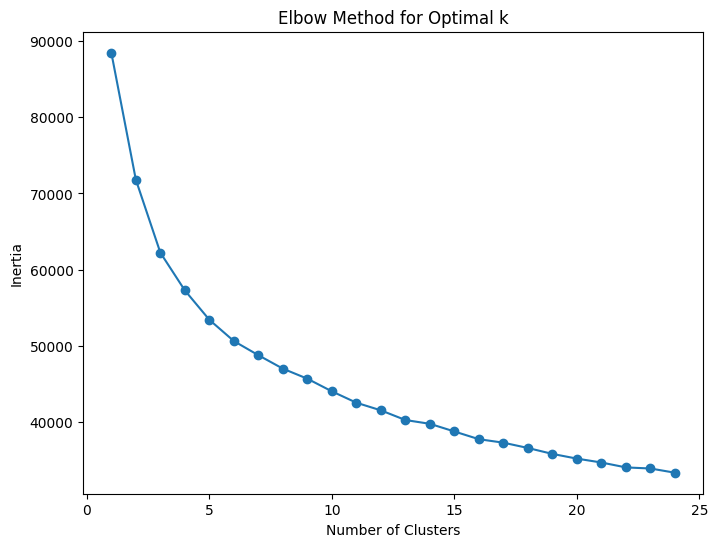

In [55]:
from sklearn.cluster import KMeans

inertia = []

for i in range(1, 25):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(xTrainS)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 25), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()